# Neural Network from scratch : 

In [222]:
import numpy as np
from abc import ABC, abstractmethod
from typing import Union
import matplotlib.pyplot as plt

In [366]:
class Tensor(np.ndarray):

    def __new__(cls, input: Tensor):
        if not isinstance(input, np.ndarray): input = np.array(input)
        if input.ndim ==1 : input = input.reshape(1, -1)
        
        obj = np.asanyarray(input).view(cls)

        return obj

    @staticmethod
    def rand(*shape: tuple[int]) -> Tensor:
        return Tensor(np.random.rand(*shape))

    @staticmethod
    def zeros(*shape: tuple[int]) -> Tensor:
        return Tensor(np.zeros(shape))
    
    @staticmethod
    def dot(t1: Tensor, t2: Tensor) -> Tensor:
        return Tensor(np.dot(t1, t2))

In [367]:
class Layer(ABC):
    weights: Tensor
    
    @abstractmethod
    def forward(self, input: Tensor) -> Tensor:
        ... 

    @abstractmethod
    def backward(self, output_dE: Tensor) -> Tensor:
        ...
    
    def __call__(self, input: Tensor) -> Tensor:
        return self.forward(input)
    
    def __repr__(self) -> str:
        return f"{self.__class__.__name__}({self.weights})"

make Linear Layer

In [503]:
class Linear(Layer):

    def __init__(self, *shape: tuple[int]):

        self.weights = Tensor.rand(*shape)
        self.grad = Tensor.zeros(*shape)
        self.input = Tensor.zeros(*shape)
        self.p_shape = shape
        
    def forward(self, input: Tensor) -> Tensor:
        self.input = input
        return Tensor.dot(input, self.weights)

    def backward(self, outdE: Tensor) -> Tensor:
        self.grad = Tensor.dot(self.input.T, outdE)
        return Tensor.dot(outdE, self.weights.T)


In [504]:
class Optimizer:

    def __init__(self, parameters: Linear, lr=0.01):
        self.parameters = parameters 
        self.lr = lr 

    def zero_grad(self):
        self.parameters.grad = Tensor.zeros(*self.parameters.p_shape)

    def step(self):
        self.parameters.weights -= self.lr * self.parameters.grad

In [505]:
class MSELoss:

    def __init__(self, parameters: Linear):
        self.parameters = parameters

    def backward(self, y_pred: Tensor, y: Tensor):
        grad = Tensor((y_pred - y))
        self.parameters.backward(grad)

In [506]:
data = np.loadtxt("./datalg.csv", delimiter=',')

In [507]:
X, y = data[:, :-1], data[:, -1]

In [508]:
X, y = Tensor(X), Tensor(y).reshape(-1, 1)

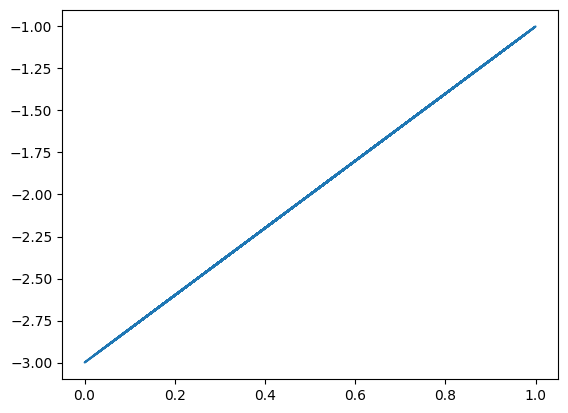

In [509]:
plt.plot(X[:, 1], y)

In [540]:
lg = Linear(2, 1)

In [541]:
mse = MSELoss(lg)

In [542]:
opt = Optimizer(lg)

In [558]:
for i in range(100):

    for xi, yi in zip(X, y):

        opt.zero_grad()
        
        y_pred = lg(Tensor(xi))
        
        mse.backward(y_pred, Tensor(yi))

        opt.step()

In [559]:
lg.grad

Tensor([[1.63469238e-12],
        [7.29751606e-13]])

In [560]:
lg.weights

Tensor([[-3.],
        [ 2.]])